# Project Description:
### This project predict rental bike count per hour in Seoul. We will be using linear Regression model to make the prediction.

## Data: 
#### Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# the code below is to ignore the tensorflow information's message
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = default, 1 = no INFO, 2 = no INFO or WARNING, 3 = no INFO, WARNING, or ERROR

In [35]:
# this encode and read the dataset file
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [36]:
# This is to see the basic info in the dataset
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

In [37]:
# this is to see how many rows and columns are in the dataset
df.shape


(8760, 14)

In [38]:
# let's drop some columns because we do not need them for our analysis
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1').drop(['Date', 'Seasons', 'Holiday'], axis = 1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [39]:
# this check the unique value in the 'Functioning Day' column
(df['Functioning Day'].unique())

array(['Yes', 'No'], dtype=object)

In [40]:
df.shape

(8760, 11)

In [41]:
# Let's change the column names
col_name = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']
df.columns = col_name
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [42]:
# this check the number of column in the dataset
df.shape[1]

11

In [43]:
# Let change the column 'functional' value to 0 or 1'
df['functional'] = (df['functional'] == 'Yes').astype(int)
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [44]:
# this check the unique value in the 'funtional' column
df['functional'].unique()

array([1, 0])

In [45]:
# this check the nnumber of 0 in each column.
(df == 0).sum()

bike_count      295
hour            365
temp             21
humidity         17
wind             74
visibility        0
dew_pt_temp      60
radiation      4300
rain           8232
snow           8317
functional      295
dtype: int64

In [46]:
# let's convert all the hour to 12 to make the project simpler
df = df[df['hour'] == 12]
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [47]:
# let's now drop the 'hour' column
df = df.drop(['hour'], axis = 1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


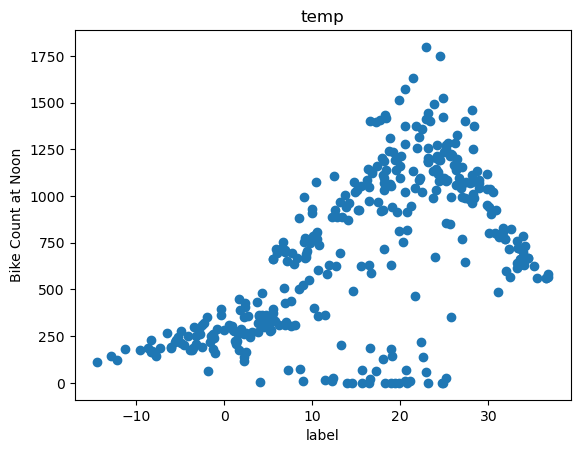

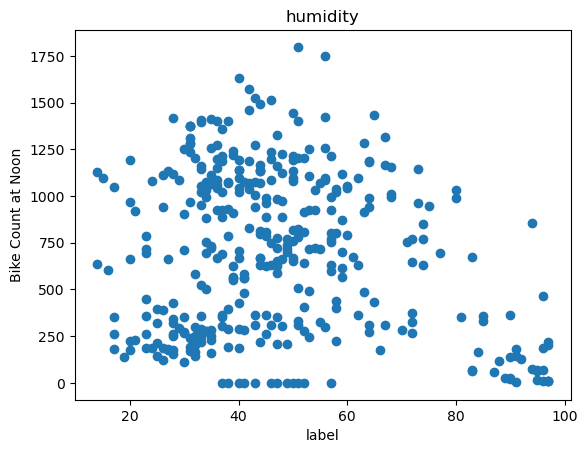

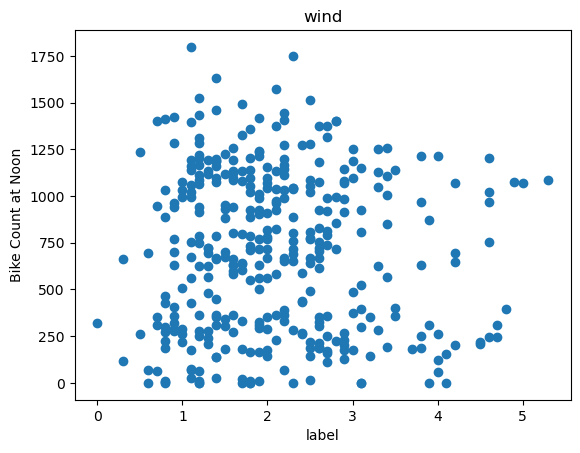

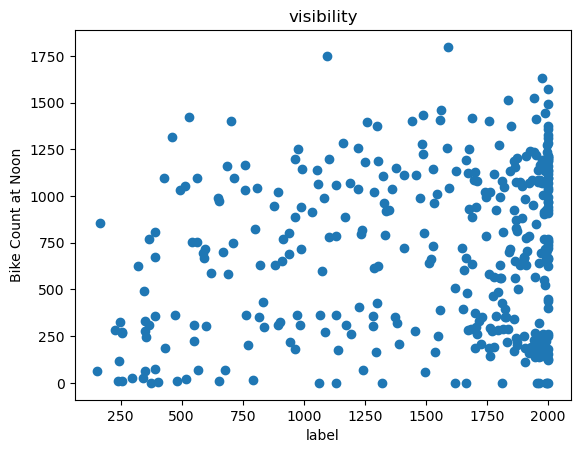

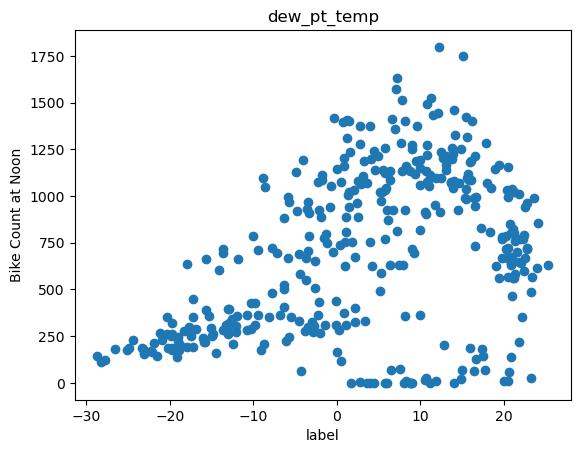

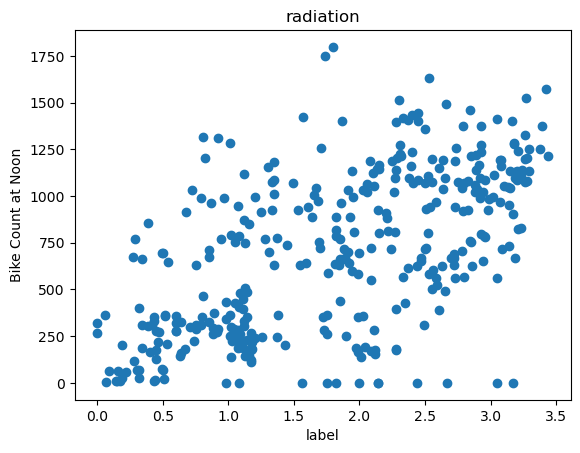

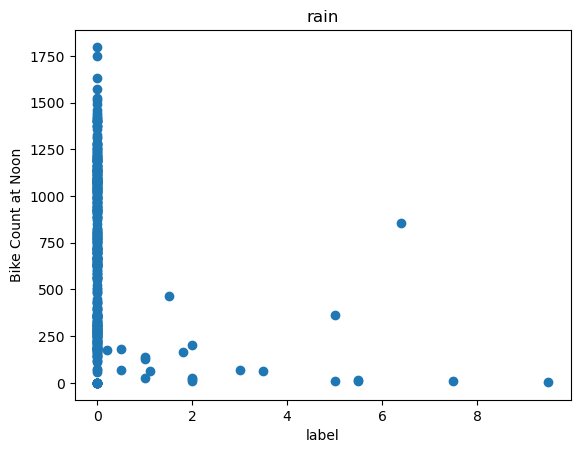

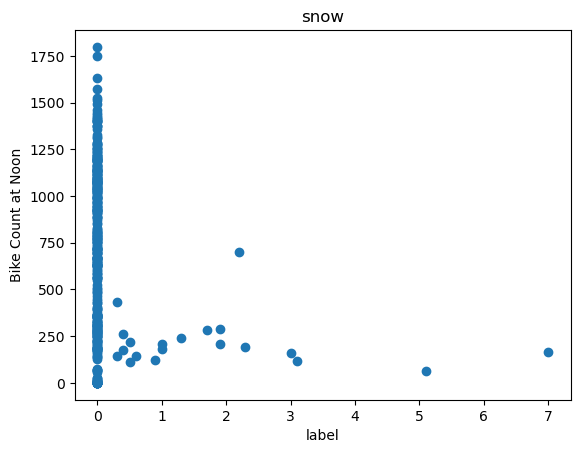

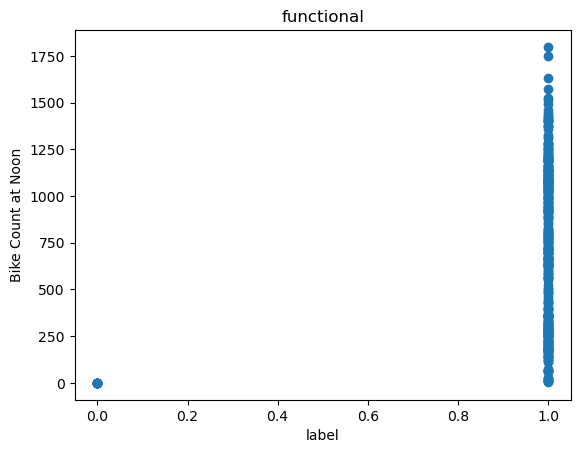

In [48]:
# let's plot few columns
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel('Bike Count at Noon')
    plt.xlabel('label')
    plt.show()
    

In [49]:
# let get rid of the columns that does not help us in our alysis
df = df.drop(['wind', 'visibility', 'functional'], axis = 1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


## We will train the model here

In [50]:
from sklearn.model_selection import train_test_split

#### First method to Train the model

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# lr = LinearRegression()
# lr.fit(X_train, y_train)

In [53]:
# y_pred = lr.predict(np.array(X, y).reshape(-1, 1))
# y_pred

## This is the second Linear Regression method for Train / Valid / Test dataset

In [54]:
# this is a manual way to do it; it gives more control
train, val, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

/Users/yssatraore/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [59]:
def get_xy(dataframe, y_label, x_labels=None):
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y
         

In [60]:
# this trrain the model
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels = ['temp'])
_, X_val_temp, y_val_temp = get_xy(val, 'bike_count', x_labels = ['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels = ['temp'])


In [64]:
print(temp_reg.coef_, temp_reg.intercept_)

NameError: name 'temp_reg' is not defined

In [65]:
# this will see the Mean Square Error
temp_reg.score(X_test_temp, y_test_temp)

NameError: name 'temp_reg' is not defined

NameError: name 'temp_reg' is not defined

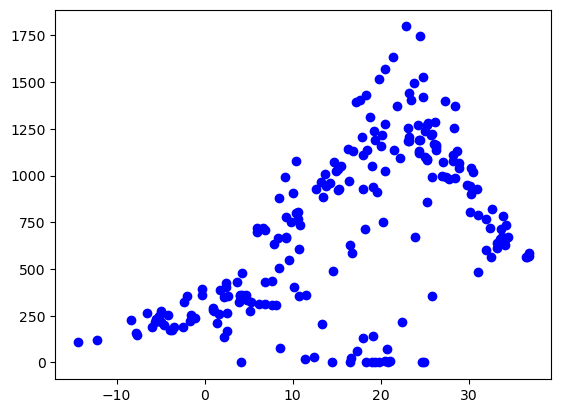

In [63]:
# this plot the Scatter 
plt.scatter(X_train_temp, y_train_temp, label='Data', color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(X).reshape(-1, 1)), label='fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikers vs the Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('temp')
plt.show()

## This is for Multiple Linear Regression

In [ ]:
df.columns

In [ ]:

train, val, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])
_, X_train_all, y_train_all = get_xy(train, 'bike_count', x_labels = df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, 'bike_count', x_labels = df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'bike_count', x_labels = df.columns[1:])


In [ ]:
#
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

In [ ]:
all_reg.predict(X_test_all)

# This is for the Neural Networks with Regression

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoc')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [ ]:
# this is the model with Tensorflow
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='mean_squared_error')

In [ ]:
# This fit the model
history = temp_nn_model.fit(
    X_train_temp.reshape(-1, 1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_val_temp, y_val_temp)
)

In [ ]:
plot_loss(history)

In [ ]:
# this plot with the backpropagation
plt.scatter(X_train_temp, y_train_temp, label='Data', color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(X, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikers vs the Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('temp')
plt.show()

## this is for a reel neural Net (with multiple nodes)

In [ ]:
# this is the Neural Net model
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mean_squared_error')


In [ ]:
# This fit the model
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data = (X_val_temp, y_val_temp),
    verbose = 0,  epochs = 1000
)

NameError: name 'nn_model' is not defined

In [ ]:
plot_loss(history)

In [ ]:
# this plot with the backpropagation
plt.scatter(X_train_temp, y_train_temp, label='Data', color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(X, nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikers vs the Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('temp')
plt.show()

In [ ]:
# this is the Neural Net model
all_normalizer = tf.keras.layers.Normalization(input_shape=(6, ), axis=-1)
all_normalizer.adapt(X_train_all)

In [ ]:

nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mean_squared_error')


In [ ]:
# This fit the model
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data = (X_val_all, y_val_all),
    verbose = 0,  epochs = 1000
)

In [ ]:
plot_loss(history)

In [ ]:
# Calculate the MSE for both Linear Reg and Neural Net

In [ ]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

In [ ]:
def MSE (y_pred, y_real):
    return(np.square(y_pred - y_real)).mean()

In [ ]:
# this is the MSE for the Linear Regression
MSE(y_pred_lr, y_test_all)

In [ ]:
# This is the MSE for the Neural Net
MSE(y_pred_nn, y_test_all)

In [ ]:
# Let's plot the real VS the prediction
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label='Lin Reg Preds')
plt.scatter(y_test_all, y_pred_nn, label='NN Preds')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims, lims, c='red')
plt.show()